In [142]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import CustomPipeline as cp
from sklearn.model_selection import GridSearchCV, KFold
import seaborn as sns

In [41]:
housingData = pd.read_csv('./data/Ames_Housing_Price_Data.csv')
housingData.drop('Unnamed: 0', axis=1, inplace=True)
train, test = np.split(housingData.sample(frac=1, random_state=42), [int(.9*len(housingData))])
train.to_csv('./data/trainData.csv')
test.to_csv('./data/testData.csv')
trainData=cp.clean('./data/trainData.csv')
testData=cp.clean('./data/testData.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

features=list(trainData.columns)
features.remove("PID")
features.remove("SalePrice")
XTrain=trainData[features]
yTrain=np.log(trainData['SalePrice'])
XTest=testData[features]
yTest=np.log(testData['SalePrice'])

In [43]:
from sklearn.ensemble import RandomForestRegressor 
rf=RandomForestRegressor(n_estimators = 100, random_state = 42) 
rf.fit(XTrain,yTrain)

RandomForestRegressor(random_state=42)

In [44]:
feat_imp = pd.Series(rf.feature_importances_, index=XTrain.columns)
feat_imp.sort_values(ascending=False)

OverallQual             5.543526e-01
GrLivArea               8.482950e-02
GarageArea              6.543389e-02
GarageCars              4.347122e-02
TotalBsmtSF             3.775953e-02
1stFlrSF                3.078101e-02
BsmtFinSF1              1.359797e-02
FullBath                1.297862e-02
LotArea                 1.234731e-02
YearBuilt               1.046886e-02
YearRemodAdd            9.830200e-03
OverallCond             9.722761e-03
GarageType              6.745590e-03
BsmtQual                6.415922e-03
GarageYrBlt             6.276332e-03
LotFrontage             6.153536e-03
BsmtFinType1            5.566699e-03
OpenPorchSF             5.463243e-03
BsmtUnfSF               4.852099e-03
MasVnrArea              4.635824e-03
2ndFlrSF                4.063824e-03
FireplaceQu             3.755354e-03
MSZoning_RM             3.470030e-03
MoSold                  2.981522e-03
MSSubClass_30           2.637849e-03
WoodDeckSF              2.601651e-03
Fireplaces              2.160113e-03
G

In [37]:
pred=rf.predict(XTest)

In [58]:
metrics.r2_score(yTest, pred)

0.97681988719092

In [45]:
params = {'ccp_alpha': [0,0.5,1],'n_estimators':[10,50,100],'min_samples_leaf':[1,2,5,10]}

cv = KFold(n_splits=5, shuffle=True)

grid = GridSearchCV(estimator=rf,param_grid=params,cv=cv,return_train_score=True)
grid.fit(XTrain,yTrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'ccp_alpha': [0, 0.5, 1],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

In [50]:
grid.best_params_

{'ccp_alpha': 0, 'min_samples_leaf': 2, 'n_estimators': 1000}

In [51]:
rfmod=RandomForestRegressor(n_estimators = 100, random_state = 42, ccp_alpha=0, min_samples_leaf=2) 
rfmod.fit(XTrain,yTrain)

RandomForestRegressor(ccp_alpha=0, min_samples_leaf=2, random_state=42)

In [151]:
feat_imp = pd.Series(rfmod.feature_importances_, index=XTrain.columns)
print(feat_imp)
feat_imp.sort_values(ascending=False)
feat_imp=feat_imp[feat_imp>0].sort_values()
feat_imp

GrLivArea               8.495340e-02
LotFrontage             6.228683e-03
LotArea                 1.229462e-02
Alley                   2.781357e-04
LotShape                6.390162e-04
Utilities               0.000000e+00
LandSlope               2.724104e-04
HouseStyle              6.068905e-04
OverallQual             5.621970e-01
OverallCond             9.583586e-03
YearBuilt               1.036058e-02
YearRemodAdd            1.099934e-02
RoofStyle               5.452752e-04
RoofMatl                2.089718e-06
Exterior1st             1.920972e-03
Exterior2nd             1.600355e-03
MasVnrType              3.310915e-04
MasVnrArea              4.550900e-03
ExterQual               1.868873e-03
ExterCond               1.874365e-03
Foundation              1.185923e-03
BsmtQual                6.415483e-03
BsmtCond                9.093124e-04
BsmtExposure            1.515887e-03
BsmtFinType1            5.352621e-03
BsmtFinSF1              1.342684e-02
BsmtFinType2            2.730383e-04
B

MSSubClass_180          1.138342e-07
PoolArea                5.051745e-07
MSSubClass_45           8.167255e-07
GasHeating              1.723414e-06
RoofMatl                2.089718e-06
Street_Pave             4.290417e-06
MiscFeature             8.934555e-06
Condition2_Feedr        8.939911e-06
Condition1_PosA         9.127515e-06
Neighborhood_BrDale     1.077272e-05
BldgType_Duplex         1.199358e-05
Neighborhood_MeadowV    1.224056e-05
BldgType_2FmCon         1.298671e-05
Neighborhood_Veenker    1.350041e-05
3SsnPorch               1.628194e-05
Neighborhood_Blmngtn    1.690729e-05
MSSubClass_40           1.697926e-05
LowQualFinSF            1.726968e-05
MSSubClass_190          2.171355e-05
LandContour_Low         2.555140e-05
MSSubClass_120          2.680428e-05
Neighborhood_Timber     2.819577e-05
Condition1_RRAn         2.861873e-05
MSZoning_RH             3.131768e-05
Neighborhood_SawyerW    3.313095e-05
MSSubClass_85           3.794513e-05
Neighborhood_StoneBr    4.163093e-05
N

In [53]:
predmod=rfmod.predict(XTest)

In [56]:
metrics.r2_score(yTest, predmod)
metrics.mean_squared_error(yTest,predmod)

0.010430539808264234

In [121]:
feat_imp.index.tolist()

['GrLivArea',
 'LotFrontage',
 'LotArea',
 'Alley',
 'LotShape',
 'LandSlope',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubCl

<AxesSubplot:>

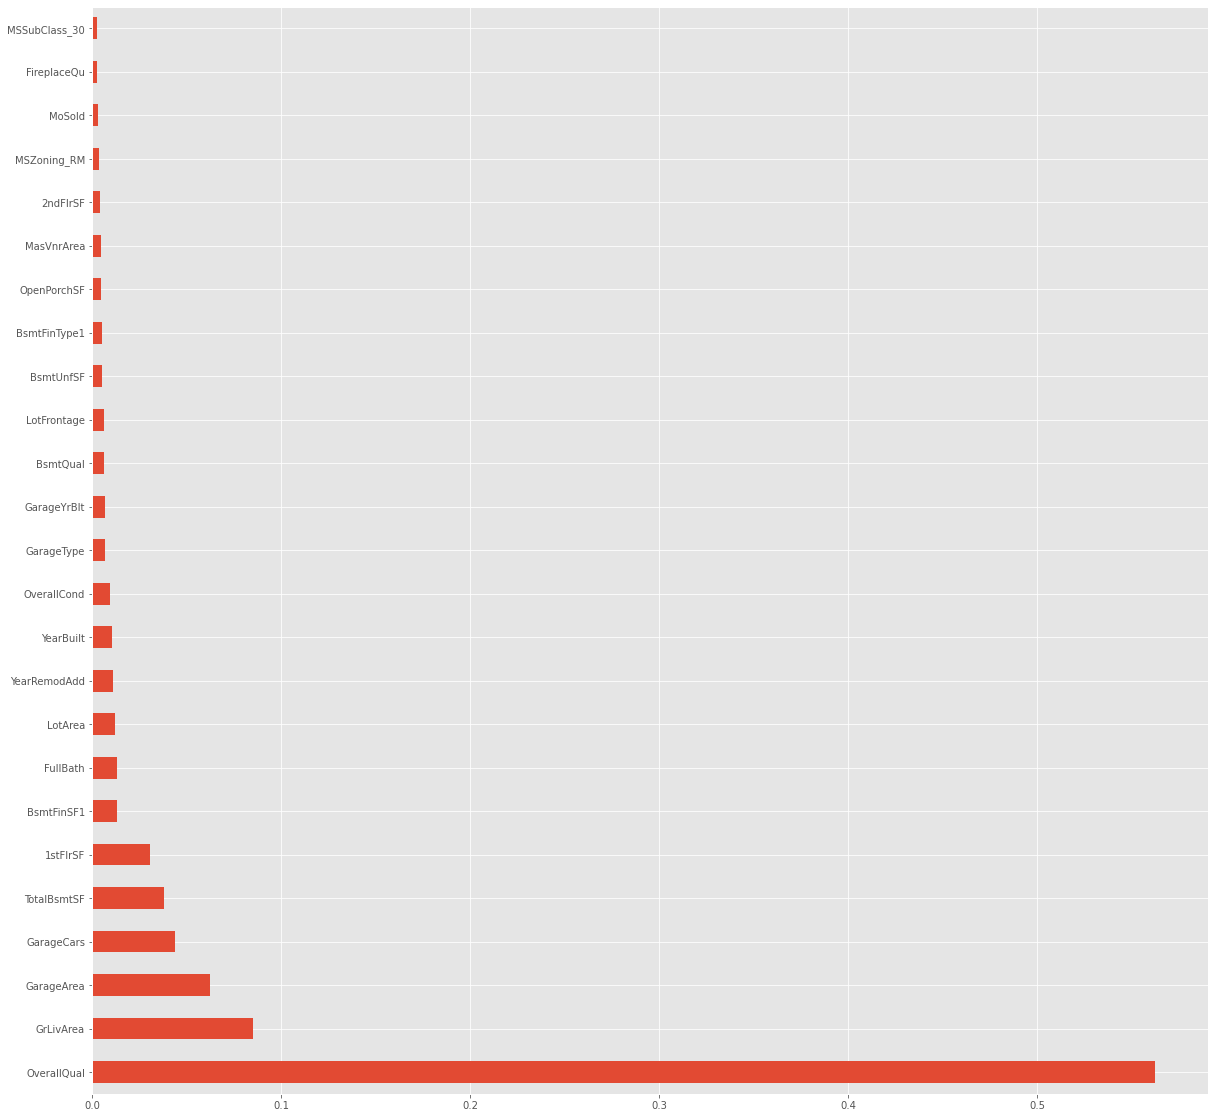

In [152]:
feat_imp.sort_values(ascending=False).head(25).plot.barh(x='index', y='values', rot=0, figsize=(20,20))

In [153]:
feat_imp.sort_values(ascending=False).head(25)

OverallQual      0.562197
GrLivArea        0.084953
GarageArea       0.062287
GarageCars       0.043625
TotalBsmtSF      0.038030
1stFlrSF         0.030526
BsmtFinSF1       0.013427
FullBath         0.013054
LotArea          0.012295
YearRemodAdd     0.010999
YearBuilt        0.010361
OverallCond      0.009584
GarageType       0.006750
GarageYrBlt      0.006600
BsmtQual         0.006415
LotFrontage      0.006229
BsmtUnfSF        0.005384
BsmtFinType1     0.005353
OpenPorchSF      0.004561
MasVnrArea       0.004551
2ndFlrSF         0.004131
MSZoning_RM      0.003422
MoSold           0.003161
FireplaceQu      0.002778
MSSubClass_30    0.002655
dtype: float64